In [18]:
'''
We import some useful packages
'''
import aggr as ag
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# folder with logs, don't put / at the end
folder = "logs_performance_plots"

## PAGE and SGD comparison

In [19]:
'''
From the function avg_from_files retrieve the number of grads, the train_loss, the accuracy, 
and for the moment no need need the standard deviations
'''
count_p64, train_loss_p64, accuracy_p64, _, _ = ag.avg_from_files(folder, 'log_mnist_lenet_page_64_eta_0_005.csv', 7)
count_s64, train_loss_s64, accuracy_s64, _, _ = ag.avg_from_files(folder, 'log_mnist_lenet_sgd_64_eta_0_005.csv', 7)
count_p256, train_loss_p256, accuracy_p256, _, _ = ag.avg_from_files(folder, 'log_mnist_lenet_page_256_eta_0_005.csv', 7)
count_s256, train_loss_s256, accuracy_s256, _, _ = ag.avg_from_files(folder, 'log_mnist_lenet_sgd_256_eta_0_005.csv', 7)

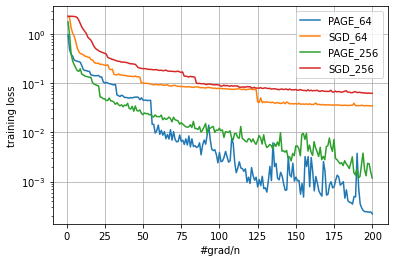

In [20]:
'''
Plot on the same graph PAGE and SGD's training losses
'''
sns.lineplot(x = np.array(count_p64)/60000, y = train_loss_p64, label = 'PAGE_64')
sns.lineplot(x = np.array(count_s64)/60000, y = train_loss_s64, label = 'SGD_64')
sns.lineplot(x = np.array(count_p256)/60000, y = train_loss_p256, label = 'PAGE_256')
sns.lineplot(x = np.array(count_s256)/60000, y = train_loss_s256, label = 'SGD_256')
plt.xlabel('#grad/n')
plt.ylabel('training loss')
plt.yscale('log')
plt.grid()
plt.show()

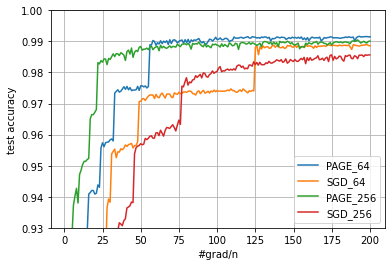

In [21]:
'''
Plot on the same graph PAGE and SGD's test accuracies
'''
sns.lineplot(x = np.array(count_p64)/60000, y = accuracy_p64, label = 'PAGE_64')
sns.lineplot(x = np.array(count_s64)/60000, y = accuracy_s64, label = 'SGD_64')
sns.lineplot(x = np.array(count_p256)/60000, y = accuracy_p256, label = 'PAGE_256')
sns.lineplot(x = np.array(count_s256)/60000, y = accuracy_s256, label = 'SGD_256')
plt.ylim(0.93, 1)
plt.xlabel('#grad/n')
plt.ylabel('test accuracy')
plt.grid()
plt.show()

## PAGE and SARAH comparison

In [22]:
'''
From the function avg_from_files retrieve the number of grads, the train_loss, the accuracy, 
and for the standard deviations that will be used to build the 95% confidence interval
'''
grads, loss, acc, std_loss, std_acc = ag.avg_from_files_sarah(folder, "sarah_example_neural_net_1-d_mnist_-a_1_-so_2_-ne_110.csv", 5)
grads_p, loss_p, acc_p, std_loss_p, std_acc_p = ag.avg_from_files(folder, "page_mlp_eta_0_045_T_14k_l2_norm.csv", 10)

In [23]:
'''
Keep just the right number of gradients in order to have a consistent plot with 100*n gradient computations span
'''
grads, loss, acc, std_loss, std_acc = grads[1:103], loss[1:103], acc[1:103], std_loss[1:103], std_acc[1:103]
grads_p, loss_p, acc_p, std_loss_p, std_acc_p = grads_p[:81], loss_p[:81], acc_p[:81], std_loss_p[:81], std_acc_p[:81]

In [24]:
'''
Computer the 95% confidence interval lower and upper bounds following the fomrmulae:
lower_bound = mean - 1.96*sdt/sqrt(n)
upper_bound = mean + 1.96*sdt/sqrt(n)
'''
lb_acc, up_acc = np.array(acc)-1.96*np.array(std_acc)/np.sqrt(5), np.array(acc)+1.96*np.array(std_acc)/np.sqrt(5)
lb_loss, up_loss = np.array(loss)-1.96*np.array(std_loss)/np.sqrt(5), np.array(loss)+1.96*np.array(std_loss)/np.sqrt(5)
lb_acc_p, up_acc_p = np.array(acc_p)-1.96*np.array(std_acc_p)/np.sqrt(10), np.array(acc_p)+1.96*np.array(std_acc_p)/np.sqrt(10)
lb_loss_p, up_loss_p = np.array(loss_p)-1.96*np.array(std_loss_p)/np.sqrt(10), np.array(loss_p)+1.96*np.array(std_loss_p)/np.sqrt(10)

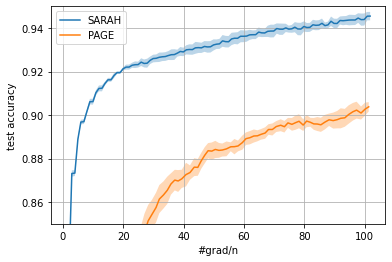

In [25]:
'''
Plot the two test accuracies highlighting the 95% confidence interval
'''
plt.plot( np.array(grads)/60000,  acc, label = 'SARAH')
plt.plot( np.array(grads_p)/60000, acc_p, label = 'PAGE')
plt.fill_between(np.array(grads)/60000, lb_acc, up_acc, alpha = .3)
plt.fill_between(np.array(grads_p)/60000, lb_acc_p, up_acc_p, alpha = .3)
plt.legend()
plt.ylim(0.85,0.95)
plt.xlabel('#grad/n')
plt.ylabel('test accuracy')
plt.grid()
plt.show()

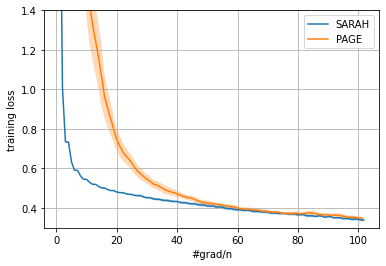

In [26]:
'''
Plot the two training losses highlighting the 95% confidence interval
'''
plt.plot( np.array(grads)/60000,  loss, label = 'SARAH')
plt.plot( np.array(grads_p)/60000, loss_p, label = 'PAGE')
plt.fill_between(np.array(grads)/60000, lb_loss, up_loss, alpha = .3)
plt.fill_between(np.array(grads_p)/60000, lb_loss_p, up_loss_p, alpha = .3)
plt.legend()
plt.ylim(0.3,1.4)
plt.xlabel('#grad/n')
plt.ylabel('training loss')
plt.grid()
plt.show()

## PAGE last and random return comparison

In [27]:
'''
From the function avg_from_files retrieve the numbers of grads, the training losses, the accuracies, 
and for the moment no need need the standard deviations
'''
grads_p, loss_p, acc_p, std_loss_p, std_acc_p = ag.avg_from_files(folder, "page_mlp_eta_0_045_T_14k_l2_norm.csv", 10)
grads_p2, loss_p2, acc_p2, std_loss_p2, std_acc_p2 = ag.avg_from_files(folder, "page_mlp_eta_0_04_T_10k_l2_norm_0_045_random_return.csv", 5)
'''
Keep a number of elements adequate to plot consistent graphs with 100*n gradient computations span
'''
grads_p, loss_p, acc_p, std_loss_p, std_acc_p = grads_p[:81], loss_p[:81], acc_p[:81], std_loss_p[:81], std_acc_p[:81]
grads_p2, loss_p2, acc_p2, std_loss_p2, std_acc_p2 = grads_p2[:78], loss_p2[:78], acc_p2[:78], std_loss_p2[:78], std_acc_p2[:78]

In [28]:
'''
Computer upper and lower bounds for the confidence interval
'''
lb_acc_p2, up_acc_p2 = np.array(acc_p2)-1.96*np.array(std_acc_p2)/np.sqrt(5), np.array(acc_p2)+1.96*np.array(std_acc_p2)/np.sqrt(5)
lb_loss_p2, up_loss_p2 = np.array(loss_p2)-1.96*np.array(std_loss_p2)/np.sqrt(5), np.array(loss_p2)+1.96*np.array(std_loss_p2)/np.sqrt(5)
lb_acc_p, up_acc_p = np.array(acc_p)-1.96*np.array(std_acc_p)/np.sqrt(10), np.array(acc_p)+1.96*np.array(std_acc_p)/np.sqrt(10)
lb_loss_p, up_loss_p = np.array(loss_p)-1.96*np.array(std_loss_p)/np.sqrt(10), np.array(loss_p)+1.96*np.array(std_loss_p)/np.sqrt(10)

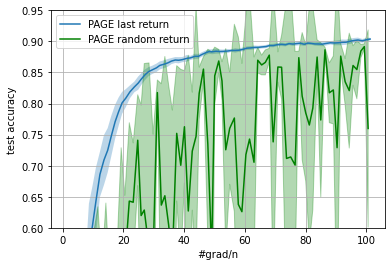

In [29]:
'''
Plot the test accuracies in the same graph
'''
plt.plot( np.array(grads_p)/60000,  acc_p, label = 'PAGE last return')
plt.plot( np.array(grads_p2)/60000, acc_p2, label = 'PAGE random return', color = 'g')
plt.fill_between(np.array(grads_p)/60000, lb_acc_p, up_acc_p, alpha = .3)
plt.fill_between(np.array(grads_p2)/60000, lb_acc_p2, up_acc_p2, alpha = .3, color = 'g')
plt.legend()
plt.ylim(0.6,0.95)
plt.xlabel('#grad/n')
plt.ylabel('test accuracy')
plt.grid()
plt.show()

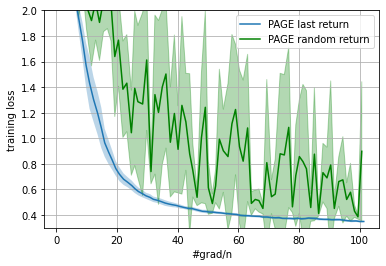

In [30]:
'''
Plot the train losses in the same graph
'''
plt.plot( np.array(grads_p)/60000,  loss_p, label = 'PAGE last return')
plt.plot( np.array(grads_p2)/60000, loss_p2, label = 'PAGE random return', color = 'g')
plt.fill_between(np.array(grads_p)/60000, lb_loss_p, up_loss_p, alpha = .3)
plt.fill_between(np.array(grads_p2)/60000, lb_loss_p2, up_loss_p2, alpha = .3, color = 'g')
plt.legend()
plt.ylim(0.3, 2)
# plt.yscale('log')
plt.xlabel('#grad/n')
plt.ylabel('training loss')
plt.grid()
plt.show()

## Raw and Cleaned logs comparison

In [31]:
folder_2 = "logs_performance_plots_clean"

In [32]:
'''
Import the "cleaned" data
'''
count_p64_c, train_loss_p64_c, accuracy_p64_c, _, _ = ag.avg_from_files(folder_2, 'log_mnist_lenet_page_64_eta_0_005.csv', 5)
count_s64_c, train_loss_s64_c, accuracy_s64_c, _, _ = ag.avg_from_files(folder_2, 'log_mnist_lenet_sgd_64_eta_0_005.csv', 5)
count_p256_c, train_loss_p256_c, accuracy_p256_c, _, _ = ag.avg_from_files(folder_2, 'log_mnist_lenet_page_256_eta_0_005.csv', 8)
count_s256_c, train_loss_s256_c, accuracy_s256_c, _, _ = ag.avg_from_files(folder_2, 'log_mnist_lenet_sgd_256_eta_0_005.csv', 5)

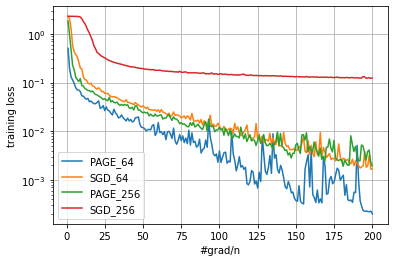

In [33]:
'''
Plot on the same graph PAGE and SGD's training losses of the "cleaned" logs
'''
sns.lineplot(x = np.array(count_p64_c)/60000, y = train_loss_p64_c, label = 'PAGE_64')
sns.lineplot(x = np.array(count_s64_c)/60000, y = train_loss_s64_c, label = 'SGD_64')
sns.lineplot(x = np.array(count_p256_c)/60000, y = train_loss_p256_c, label = 'PAGE_256')
sns.lineplot(x = np.array(count_s256_c)/60000, y = train_loss_s256_c, label = 'SGD_256')
plt.xlabel('#grad/n')
plt.ylabel('training loss')
plt.yscale('log')
plt.grid()
plt.show()

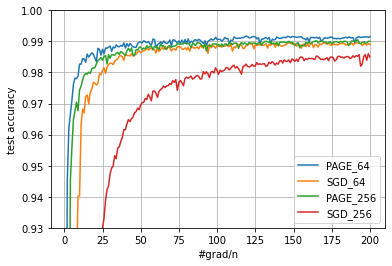

In [34]:
'''
Plot on the same graph PAGE and SGD's test accuracies of the "cleaned" logs
'''
sns.lineplot(x = np.array(count_p64_c)/60000, y = accuracy_p64_c, label = 'PAGE_64')
sns.lineplot(x = np.array(count_s64_c)/60000, y = accuracy_s64_c, label = 'SGD_64')
sns.lineplot(x = np.array(count_p256_c)/60000, y = accuracy_p256_c, label = 'PAGE_256')
sns.lineplot(x = np.array(count_s256_c)/60000, y = accuracy_s256_c, label = 'SGD_256')
plt.ylim(0.93, 1)
plt.xlabel('#grad/n')
plt.ylabel('test accuracy')
plt.grid()
plt.show()